# Profitable App Profiles for the App Store and Google Play Markets
---

## 1. Introduction

The aim of this project is to **identify which types of mobile apps are profitable in the App Store and Google Play markets**, for a team of developers who intend to build a **free English language** app. The project will facilitate the team to build an app which can attract more users, and in turn generate more revenue via in-app ads.

As of Q1 2021, there are approximately 2.2 million iOS apps on the App Store and 3.5 million Android apps on Google Play. The following sample datasets were analyzed to gain quick insights on App Store and Google Play markets:

- [A dataset containing data about approximately 10,000 Android apps from Google Play](https://www.kaggle.com/lava18/google-play-store-apps).
- [A dataset containing data about approximately 7,000 iOS apps from the App Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

---

## 2. Open and Explore the Data

In [1]:
from csv import reader

# Open the Google Play dataset
open_file = open('googleplaystore.csv', encoding = "utf8")
read_file = reader(open_file)
android_apps = list(read_file)

android_header = android_apps[0]
android = android_apps[1:]

# Open the App Store dataset
open_file = open('AppleStore.csv', encoding = "utf8")
read_file = reader(open_file)
ios_apps = list(read_file)

ios_header = ios_apps[0]
ios = ios_apps[1:]

We'll first write a function named `explore_data()` that we can use repeatedly to explore rows in a more readable way, with an option to show the number of rows and columns for any data set.

In [2]:
def explore_data(dataset, start, end, rows_and_columns = False):
    dataset_slice = dataset[start:end]    
    
    for row in dataset_slice:
        print(row)

    if rows_and_columns:
        print('\n')
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))
    
# Headers and first 3 rows of Google Play dataset 
print(android_header)
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


We see that the Google Play data set has **10841 Android apps**. At a quick glance, the columns that might be useful for the purpose of our analysis are `'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', and 'Genres'`.

Now let's take a look at the App Store data set.

In [3]:
# Headers and first 3 rows of App Store dataset 
print(ios_header)
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']
['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']
['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


We have **7197 iOS apps** in this data set. From the [data set documentation](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home), the useful columns are:

- `'track_name'`: App Name

- `'currency'`: Currency Type

- `'price'`: Price amount

- `'ratingcounttot'`: User Rating counts (for all version)

- `'ratingcountver'`: User Rating counts (for current version)

- `'prime_genre'`: Primary Genre

--- 

## 3. Delete Incorrect Data

The Google Play data set has a dedicated [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), and we can see that [one of the discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) outlines an error for row 10472. Let's print this row and compare it against the header.

In [4]:
print(android_header)
print(android[10472])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


The row 10472 corresponds to the app *Life Made WI-Fi Touchscreen Photo Frame*, and we can see that the rating is 19. This is clearly off because the maximum rating for a Google Play app is 5 (as mentioned in the discussions section, this problem is caused by a missing value in the `'Category'` column). As a consequence, we'll delete this row.

In [5]:
print('Toal number of android apps before deleting erroneous row:', len(android))

del android[10472] # run this only once

print('Total number of android apps after deleting erroneous row:', len(android)) # confirm only 1 erroneous row deleted

Toal number of android apps before deleting erroneous row: 10841
Total number of android apps after deleting erroneous row: 10840


---

## 4. Remove Duplicate Entries

If we explore the Google Play data set, we'll find that some apps have more than one entry. For instance, the application Instagram has four entries:

In [6]:
print(android_header)

for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


The main difference happens on the fourth position of each row, which corresponds to the number of reviews. The different numbers show that the data was collected at different times.

In total, there are **1,181 cases** where an app occurs more than once:

In [7]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('Number of duplicate apps: ', len(duplicate_apps))
print('Examples of duplicate apps: ', duplicate_apps[:10]) # print names of first 10 duplicates

Number of duplicate apps:  1181
Examples of duplicate apps:  ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack']


We need to remove the duplicate entries and keep only one entry per app. The main difference between duplicate entries happens on the fourth position of each row, which corresponds to the number of reviews.

We can use this to build a criterion for keeping rows. We'll keep the rows that have the highest number of reviews because the higher the number of reviews, the more reliable the ratings.

In [8]:
# Create a dictionary where each key is a unique app name, and the value is the highest number of reviews of that app
reviews_max = {}

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    # Use the dictionary to create a new data set
    if name not in reviews_max:
        reviews_max[name] = n_reviews

    # For duplicate entries, select the row with highest number of reviews
    elif reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews

Previously, we found 1,181 cases where an app occurs more than once, so the length of the new dictionary (of unique apps) should be equal to the difference between the length of the original data set and 1,181.

In [9]:
print('Expected length of new dictionary: ', len(android) - 1181)
print('Actual length new dictionary: ', len(reviews_max))

Expected length of new dictionary:  9659
Actual length new dictionary:  9659


Use the `reviews_max` dictionary to remove the duplicates and keep the entries with the highest number of reviews.

In [10]:
android_clean = []
already_added = [] # to keep track of apps already inserted in android_clean

for app in android:
    name = app[0]
    n_reviews = float(app[3])

    if (n_reviews == reviews_max[name]) and (name not in already_added): # only 1 entry for each app with highest n_reviews
        android_clean.append(app)
        already_added.append(name)
        
print(f'There are {len(android_clean)} unique apps in the Android dataset, as expected.')

There are 9659 unique apps in the Android dataset, as expected.


## 5. Remove Non-English Apps

We also noticed that some of the apps are not directed toward an English-speaking audience:

In [11]:
print(ios[813][1])
print(ios[6731][1])

print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
中国語 AQリスニング
لعبة تقدر تربح DZ


Data on the non-English apps are not relevant for this analysis, so we'll only retain apps whose name only contains the following:

- letters from the English alphabet (a - z)
- numbers composed of digits from 0 to 9
- punctuation marks (., !, ?, ;, etc.)
- other symbols (+, *, /, etc.)

All these characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and we will build a function that checks an app name and tells us whether it contains non-ASCII characters.

In [12]:
def is_english(string):
    for character in string:
        if ord(character) > 127:
            return False
    return True

print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
False
False
False


The function seems to work fine, but some English app names use emojis or other symbols (™, — (em dash), – (en dash), etc.) that fall outside of the ASCII range. Because of this, we'll remove useful apps if we use the function in its current form.

To minimize the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters:

In [13]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
            
    if non_ascii > 3: # threshold for number of non-ASCII characters
        return False
    else:
        return True

print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
False
True
True


The function is still not perfect, and very few non-English apps might get past our filter, but this seems sufficient at this point in our analysis.

Below, we use the `is_english()` function to filter out the non-English apps for both data sets:

In [14]:
# Filter out non-english apps from Google Play dataset
android_english = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)

print(f'There are {len(android_english)} English Android apps on Google Play.')
        
# Filter out non-english apps from App Store dataset
ios_english = []

for app in ios:
    name = app[1]
    if is_english(name):
        ios_english.append(app)
        
print(f'There are {len(ios_english)} English iOS apps on App Store.')

There are 9614 English Android apps on Google Play.
There are 6183 English iOS apps on App Store.


--- 

## 6. Isolate the Free Apps

The team only build apps that are free to download and install, and the main source of revenue consists of in-app ads. We will isolate data only on the free apps for both datasets below.

In [15]:
# Filter out non-free apps from Google Play dataset
android_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)

print(f'There are {len(android_final)} free English Android apps on Google Play.')
        
# Filter out non-free apps from App Store dataset
ios_final = []

for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)
        
print(f'There are {len(ios_final)} free English iOS apps on App Store.')

There are 8864 free English Android apps on Google Play.
There are 3222 free English iOS apps on App Store.


We're left with **8864 Android apps** and **3222 iOS apps**, which should be sufficient for our analysis.

--- 

## 7. Most Common Apps by Genre

Because our end goal is to add the app on both the App Store and Google Play, we need to find app profiles that are successful on both markets. Let's begin the analysis by getting a sense of the most common genres for each market. 

For this, we'll build a frequency table for the `prime_genre` column of the App Store data set, and the `Genres` and `Category` columns of the Google Play data set.

In [16]:
# Function to output frequency table from input dataset and column index
def freq_table(dataset, index):

    # Compute absolute value counts
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    # Divide value counts by total number of rows to obtain percentage values
    table_percentages = {}
    
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage
    
    return table_percentages

# Function to plot frequency table on bar graph
import matplotlib.pyplot as plt

def display_table(dataset, index, title = None, xlabel = None, ylabel = None):
    table = freq_table(dataset, index)      
    sorted_table = sorted(table.items(), key = lambda x: x[1], reverse = True) # sort in descending order

    value_list = []
    key_list = []

    for key, value in sorted_table[:10]: # only plot top 10 values
        key_list.append(key)
        value_list.append(value)
        
    plt.barh(key_list, value_list, height = 0.4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

We start by examining the frequency table for the `prime_genre` column of the App Store data set.

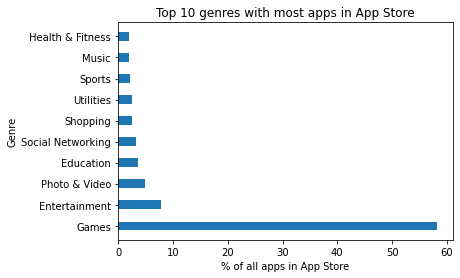

In [17]:
display_table(ios_final, -5, 
              'Top 10 genres with most apps in App Store', 
              '% of all apps in App Store', 
              'Genre')

The free English apps on the App Store are mostly designed for fun (e.g. games, entertainment, photo and video, social networking), while apps with practical purposes (e.g. education) are more rare. In fact, more than half of the free English apps are gaming apps!

However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

Let's continue by examining the `Genres` and `Category` columns of the Google Play data set (two columns which seem to be related).

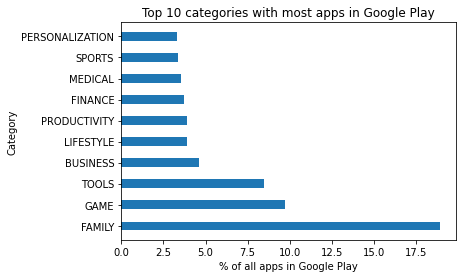

In [18]:
display_table(android_final, 1, 
              'Top 10 categories with most apps in Google Play', 
              '% of all apps in Google Play', 
              'Category')

The free English apps on the Google Play seem more targeted for practical uses (e.g. family, tools, business) rather than for fun and games. However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

In [19]:
android_family = []

for row in android:
    if row[1] == 'FAMILY':
        android_family.append(row)

explore_data(android_family, 0, 3, True)

['YouTube Kids', 'FAMILY', '4.5', '470694', 'Varies with device', '50,000,000+', 'Free', '0', 'Everyone', 'Entertainment;Music & Video', 'August 3, 2018', '3.43.3', '4.1 and up']
['Candy Bomb', 'FAMILY', '4.4', '42145', '20M', '10,000,000+', 'Free', '0', 'Everyone', 'Casual;Brain Games', 'July 4, 2018', '2.9.3181', '4.0.3 and up']
['ROBLOX', 'FAMILY', '4.5', '4449910', '67M', '100,000,000+', 'Free', '0', 'Everyone 10+', 'Adventure;Action & Adventure', 'July 31, 2018', '2.347.225742', '4.1 and up']


Number of rows: 1972
Number of columns: 13


Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column:

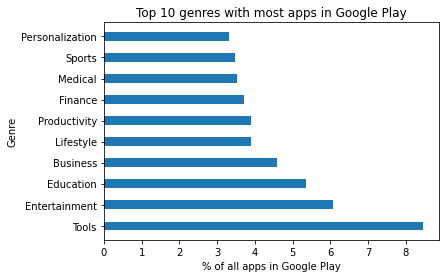

In [20]:
display_table(android_final, -4,
              'Top 10 genres with most apps in Google Play', 
              '% of all apps in Google Play', 
              'Genre')

The difference between the `Genres` and the `Category` columns is not clear, but one thing we can notice is that the `Genres` column is much more granular. We're looking for the bigger picture at the moment, so we'll only work with the `Category` column moving forward.

Up to this point, we found that **the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps**. Now we'd like to understand the kind of apps that have most users.

---

## 8. Most Popular Apps by Genre on the App Store

To find out the apps with the most users, we calculate the average number of installs for each app genre. 

This information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the `rating_count_tot` column.

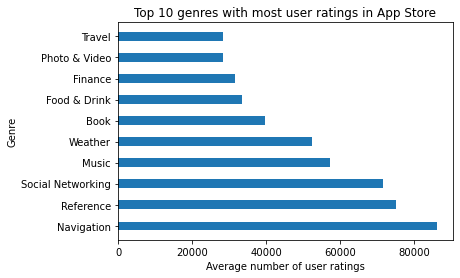

In [21]:
genres_ios = {}

for genre in freq_table(ios_final, -5):
    total = 0
    len_genre = 0
    
    for app in ios_final:
        genre_app = app[-5]
        
        if genre_app == genre:
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
        
    avg_n_ratings = total / len_genre
    genres_ios[genre] = avg_n_ratings

genres_ios_sorted = sorted(genres_ios.items(), key = lambda x: x[1], reverse = True)
value_list = []
key_list = []

for key, value in genres_ios_sorted[:10]: # only plot top 10 values
    key_list.append(key)
    value_list.append(value)

plt.barh(key_list, value_list, height = 0.4)
plt.title('Top 10 genres with most user ratings in App Store')
plt.xlabel('Average number of user ratings')
plt.ylabel('Genre')
plt.show()

On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together.

In [22]:
for app in ios_final:
    if app[-5] == 'Navigation' and float(app[5]) > 100000:
        print(f'{app[1]}: {app[5]} ratings')

Waze - GPS Navigation, Maps & Real-time Traffic: 345046 ratings
Google Maps - Navigation & Transit: 154911 ratings


The same pattern applies to social networking apps and music apps, where the average number is heavily influenced by a few giants (e.g. Facebook/Skype, Pandora/Spotify respectively).

Thus, navigation, social networking and music apps may seem more popular than they really are, as the average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings. 

Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [23]:
for app in ios_final:
    if app[-5] == 'Reference' and float(app[5]) > 100000:
        print(f'{app[1]}: {app[5]} ratings')

Bible: 985920 ratings
Dictionary.com Dictionary & Thesaurus: 200047 ratings


However, this niche seems to show some potential. **One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book.**

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means **a practical app might have more of a chance to stand out among the huge number of apps on the App Store.**

---

## 9. Most Popular Apps by Genre on Google Play

For the Google Play data set, we can find this information in the Installs column

For the Google Play market, we can determine the popularity of each genre from the `Installs` column. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [24]:
print(freq_table(android_final, 5).keys())

dict_keys(['10,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+', '1,000,000+', '10,000,000+', '5,000+', '500,000+', '1,000,000,000+', '100,000,000+', '1,000+', '500,000,000+', '500+', '100+', '50+', '10+', '1+', '5+', '0+', '0'])


Although the data is not precise, we only want to get an idea which app genres attract the most users. To compute the average number of installs for each genre, we will assume that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs etc.

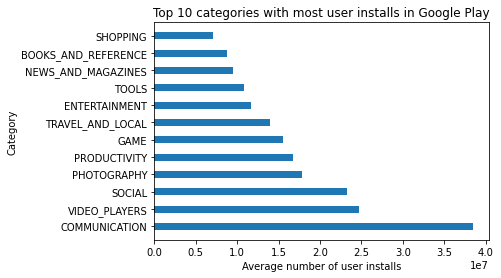

In [25]:
categories_android = {}

for category in freq_table(android_final, 1):
    total = 0
    len_category = 0
    
    for app in android_final:
        category_app = app[1]
        
        if category_app == category:
            n_installs = app[5]
            n_installs = n_installs.replace('+', '')
            n_installs = n_installs.replace(',', '')
            total += float(n_installs)
            len_category += 1
            
    avg_n_installs = total / len_category
    categories_android[category] = avg_n_installs

categories_android_sorted = sorted(categories_android.items(), key = lambda x: x[1], reverse = True)
value_list = []
key_list = []

for key, value in categories_android_sorted[:12]: # only plot top 12 values
    key_list.append(key)
    value_list.append(value)

plt.barh(key_list, value_list, height = 0.4)
plt.title('Top 10 categories with most user installs in Google Play')
plt.xlabel('Average number of user installs')
plt.ylabel('Category')
plt.show()

On average, communication apps have the most installs. This number is heavily skewed up by a few apps that have over one billion installs (e.g. WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail), and a few others with over 100 and 500 million installs:

In [26]:
# Print communication apps with > 1 billion installs
for app in android_final:
    if app[1] == 'COMMUNICATION' and app[5] == '1,000,000,000+':
        print(f'{app[0]}: {app[5]} installs')

print('\n')

# # Print communication apps with > 500 million installs
# for app in android_final:
#     if app[1] == 'COMMUNICATION' and app[5] == '500,000,000+':
#         print(f'{app[0]}: {app[5]} installs')

# print('\n')

# # Print communication apps with > 100 million installs
# for app in android_final:
#     if app[1] == 'COMMUNICATION' and app[5] == '100,000,000+':
#         print(f'{app[0]}: {app[5]} installs')

WhatsApp Messenger: 1,000,000,000+ installs
Messenger – Text and Video Chat for Free: 1,000,000,000+ installs
Skype - free IM & video calls: 1,000,000,000+ installs
Google Chrome: Fast & Secure: 1,000,000,000+ installs
Gmail: 1,000,000,000+ installs
Hangouts: 1,000,000,000+ installs




If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times:

In [27]:
under_100_m = []

# Clean and convert number of installs to float for computation
for app in android_final:
    n_installs = app[5] 
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000): 
        under_100_m.append(float(n_installs))

print(f'The average number of installs for Android communication apps will be reduced from 38456119 to {sum(under_100_m) / len(under_100_m):.0f}.')

The average number of installs for Android communication apps will be reduced from 38456119 to 3603485.


We see the same pattern for the video players, social, photography and productivity apps. Again, the main concern is that these  genres seem to be dominated by a few giants who are hard to compete against.

**The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,812**. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

In [28]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(f'{app[0]}: {app[5]} installs')

Google Play Books: 1,000,000,000+ installs
Bible: 100,000,000+ installs
Amazon Kindle: 100,000,000+ installs
Wattpad 📖 Free Books: 100,000,000+ installs
Audiobooks from Audible: 100,000,000+ installs


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [29]:
# # Print book and reference apps with 50-100 million installs
# for app in android_final:
#     if app[1] == 'BOOKS_AND_REFERENCE' and app[5] == '50,000,000+':
#         print(f'{app[0]}: {app[5]} installs')

# print('\n')

# Print book and reference apps with 10-50 million installs
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and app[5] == '10,000,000+':
        print(f'{app[0]}: {app[5]} installs')

# print('\n')

# # Print book and reference apps with 5-10 million installs
# for app in android_final:
#     if app[1] == 'BOOKS_AND_REFERENCE' and app[5] == '5,000,000+':
#         print(f'{app[0]}: {app[5]} installs')

# print('\n')

# # Print book and reference apps with 1-5 million installs
# for app in android_final:
#     if app[1] == 'BOOKS_AND_REFERENCE' and app[5] == '1,000,000+':
#         print(f'{app[0]}: {app[5]} installs')

Wikipedia: 10,000,000+ installs
Cool Reader: 10,000,000+ installs
FBReader: Favorite Book Reader: 10,000,000+ installs
HTC Help: 10,000,000+ installs
Moon+ Reader: 10,000,000+ installs
Aldiko Book Reader: 10,000,000+ installs
Al-Quran (Free): 10,000,000+ installs
Al Quran Indonesia: 10,000,000+ installs
Al'Quran Bahasa Indonesia: 10,000,000+ installs
Quran for Android: 10,000,000+ installs
Dictionary.com: Find Definitions for English Words: 10,000,000+ installs
English Dictionary - Offline: 10,000,000+ installs
NOOK: Read eBooks & Magazines: 10,000,000+ installs
Dictionary: 10,000,000+ installs
Spanish English Translator: 10,000,000+ installs
Dictionary - Merriam-Webster: 10,000,000+ installs
JW Library: 10,000,000+ installs
Oxford Dictionary of English : Free: 10,000,000+ installs
English Hindi Dictionary: 10,000,000+ installs


This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. **It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets**.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book.

---

## 10. Conclusion

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

**We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.** The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.